In [2]:
import pickle as pckl
import seaborn as sb
import pandas as pd
from datetime import datetime

In [38]:
data = pckl.load(open('monster_hunter_world.pckl','rb'))

In [39]:
data2 = pd.DataFrame(data)

In [41]:
len(data2)

34221

In [42]:
features_dict = {'review': 'review',
                'voted_up': 'upvoted',
                'votes_up': 'comment_upvotes',
                'votes_funny': 'comment_funny_votes',
                'written_during_early_access': 'early_review',
                'timestamp_updated': 'time_of_review',
                'author.playtime_forever': 'minutes_played',
                'author.playtime_last_two_weeks': 'playtime_2weeks',
                'author.last_played': 'last_played',
                'author.num_games_owned': 'games_owned',
                'author.num_reviews': 'author_reviews',
                'steam_purchase': 'purchased',
                'received_for_free': 'free'}

features = list(features_dict.values())

In [43]:
df = data2.rename(index=str, columns=features_dict)
df = df.drop(columns = ['author', 'comment_count', 'language', 'free', 
                        'recommendationid', 'purchased', 'timestamp_created',
                        'comment_funny_votes', 'comment_upvotes', 'weighted_vote_score',
                       'early_review'])
df.head()

,review,time_of_review,upvoted
0,Runs great on maxed settings on my PC in the l...,1548893235,True
1,I've lost so many hours of my life playing thi...,1548892298,True
2,Dodogama is best boy.,1548892223,True
3,Edit 4: I'm officially going to change my revi...,1548891532,True
4,If you're into grinding and farming then this ...,1548890343,True


In [44]:
df['time_of_review_unix'] = df['time_of_review']

In [39]:
#sorted_df['percent_upvotes'] = list(reversed(sorted_df['percent_upvotes']))

In [45]:
#df['last_played'] = pd.to_datetime(df['last_played'], unit='s')
df['time_of_review'] = pd.to_datetime(df['time_of_review_unix'], unit='s')
sorted_df = df.sort_values(by='time_of_review',ascending=True)

In [46]:
total_upvotes = 0
upvotes = []
total_votes = list(range(1,len(df)+1))

for i in range(len(df)):
    if sorted_df.iloc[i].upvoted == True:
        total_upvotes += 1
        upvotes.append(total_upvotes)
    else:
        upvotes.append(total_upvotes)
        

In [47]:
sorted_df['upvotes'] = upvotes
sorted_df['total_votes'] = total_votes
sorted_df['percent_upvotes'] = sorted_df['upvotes']/sorted_df['total_votes']

In [23]:
#sorted_df = df.sort_values(by='time_of_review',ascending=True)

#sorted_df['percent_upvotes'] = sorted_df['upvotes']/sorted_df['total_votes']
#sorted_df.head()

In [48]:
sorted_df = sorted_df.reset_index()
sorted_df = sorted_df.drop(columns = ['index'])
sorted_df.head()

,index,review,time_of_review,upvoted,time_of_review_unix,upvotes,total_votes,percent_upvotes
0,34220,FIRST !,2018-08-09 16:21:56,True,1533831716,1,1,1.0
1,34219,10/10 would buy again,2018-08-09 16:22:41,True,1533831761,2,2,1.0
2,34218,Nice....,2018-08-09 16:22:52,True,1533831772,3,3,1.0
3,34217,1st,2018-08-09 16:24:58,True,1533831898,4,4,1.0
4,34216,Needs controller support for a positive review...,2018-08-09 16:26:01,False,1533831961,4,5,0.8


In [54]:
#sorted_df = pckl.load(open('NMS_sorted.pckl','rb'))

In [56]:

#pckl.dump(sorted_df,open('NMS_sorted.pckl','wb'))

In [36]:
import seaborn as sb
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.dates import DateFormatter

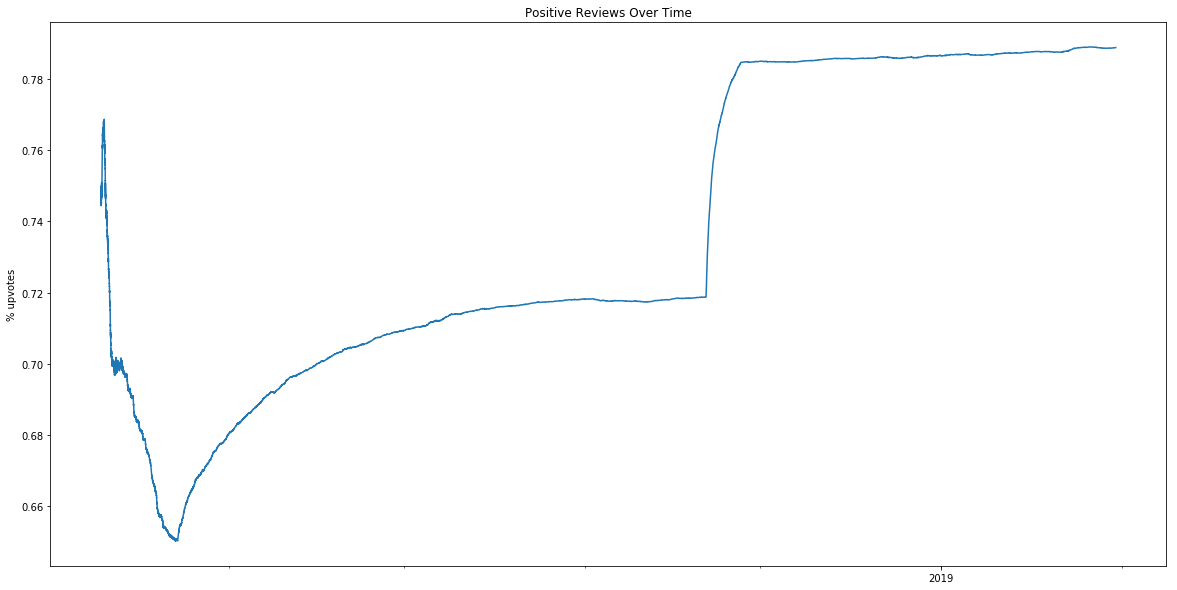

In [50]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

date = sorted_df['time_of_review'].iloc[1000:]
percent = sorted_df['percent_upvotes'].iloc[1000:]

#ax = plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(date, percent)


ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.ylabel('% upvotes')
plt.title('Positive Reviews Over Time')

plt.show()

In [61]:
fig.savefig('ARK_percent_upvotes_over_time.png')

In [64]:
import numpy as np

In [65]:
data['y_p'] = np.diff(sorted_df['percent_upvotes']) / np.diff(sorted_df['time_of_review'])
data['x_p'] = (np.array(sorted_df['time_of_review'])[:-1] + np.array(sorted_df['time_of_review'])[1:]) / 2

TypeError: ufunc true_divide cannot use operands with types dtype('float64') and dtype('<m8[ns]')

In [ ]:
sorted_df.head()

In [68]:
data_check = pckl.load(open('ARK.pckl','rb'))

In [69]:
data_check.head()

,author.last_played,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.steamid,comment_count,language,received_for_free,recommendationid,review,steam_purchase,timestamp_created,timestamp_updated,voted_up,votes_funny,votes_up,weighted_vote_score,written_during_early_access
0,1548014842,6,1,412,412,76561198846762449,0,english,False,48448687,Cool but it completly ruined my Graphics Card...,True,1548014192,1548014192,False,1,0,0,False
1,1548017764,238,35,2235,2235,76561198008955625,0,english,False,48430381,"After 30 hours of gameplay, this is how it was...",False,1547938970,1548013264,False,0,1,0.523809552192687988,False
2,1545131771,171,3,5473,0,76561197991488912,0,english,False,48447847,Made by the scummiest gaming company ever.,False,1548011162,1548011162,False,0,2,0.52173912525177002,False
3,1504742084,377,6,101,0,76561198013957136,0,english,False,48447210,"""Disk space required: 101093 mb"" oh my lord",False,1548008968,1548008968,False,1,0,0,False
4,1548017463,11,1,575,575,76561197993720855,0,english,False,48446867,So i have spent over 24 hours trying to log in...,True,1548007836,1548007836,False,0,1,0.523809552192687988,False


In [1]:
topics

NameError: name 'topics' is not defined